In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import  warnings

warnings.filterwarnings('ignore')


In [2]:
df_train = pd.read_csv('train_house.csv')
df_test = pd.read_csv('test_house.csv')


In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
print(df_test.shape)
print(df_train.shape)

(1459, 80)
(1460, 81)


In [6]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
df_train.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


skewness: 1.882876
kurtosis: 6.536282


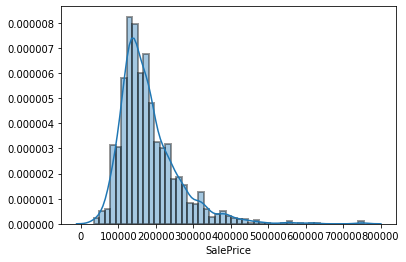

In [9]:
sns.distplot(df_train['SalePrice'],hist_kws = dict(edgecolor = 'k',linewidth = 2))
print('skewness: %f' % df_train['SalePrice'].skew())
print("kurtosis: %f" % df_train['SalePrice'].kurt())

Skewnes: 0.121335
Kurtosis: 0.809532


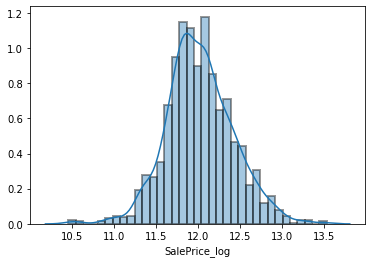

In [10]:
df_train['SalePrice_log'] = np.log(df_train['SalePrice'])
sns.distplot(df_train['SalePrice_log'],hist_kws = dict(edgecolor='k',linewidth = 2));
print("Skewnes: %f" % df_train['SalePrice_log'].skew())
print("Kurtosis: %f"% df_train['SalePrice_log'].kurt())

In [11]:
numerical_features = df_train.dtypes[df_train.dtypes != "object"].index
print("No. of numerical features : ", len(numerical_features))
categorical_features = df_train.dtypes[df_train.dtypes == 'object'].index
print("No. of Categorical features : ",  len(categorical_features))

No. of numerical features :  39
No. of Categorical features :  43


In [12]:
print(df_train[numerical_features].columns)
print("*"*100)
print(df_test[categorical_features].columns)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'SalePrice_log'],
      dtype='object')
****************************************************************************************************
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterC

In [13]:
df_train[numerical_features].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,SalePrice_log
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,61,0,0,0,0,0,2,2008,208500,12.247694
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,0,0,5,2007,181500,12.109011
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,42,0,0,0,0,0,9,2008,223500,12.317167
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,35,272,0,0,0,0,2,2006,140000,11.849398
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,84,0,0,0,0,0,12,2008,250000,12.429216


In [14]:
df_train.isnull().count()

Id               1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1460
LotArea          1460
                 ... 
YrSold           1460
SaleType         1460
SaleCondition    1460
SalePrice        1460
SalePrice_log    1460
Length: 82, dtype: int64

In [15]:
#List of features with missing values
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis  = 1,keys=['Total','Percent']) #axis = 1is used to show both parallel(i.e toatl&%)
missing_data.head(30)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageQual,81,0.055479
GarageCond,81,0.055479
GarageFinish,81,0.055479
GarageType,81,0.055479


In [16]:
cols_fillna = ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu',
               'GarageQual','GarageCond','GarageFinish','GarageType', 'Electrical',
               'KitchenQual', 'SaleType', 'Functional', 'Exterior2nd', 'Exterior1st',
               'BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2',
               'MSZoning', 'Utilities']
for  col in cols_fillna:
    df_train[col].fillna("None",inplace = True)
    df_test[col].fillna("None",inplace = True)

In [17]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=['Total','percent'])
missing_data.head(30)

,Total,percent
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrArea,8,0.005479
Foundation,0,0.000000
RoofStyle,0,0.000000
RoofMatl,0,0.000000
Exterior1st,0,0.000000
Exterior2nd,0,0.000000
MasVnrType,0,0.000000
ExterQual,0,0.000000


In [18]:
#rest of data we fill with mean
df_train.fillna(df_train.mean(),inplace=True)
df_test.fillna(df_test.mean(),inplace =True)

In [19]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=['Total','percent'])
missing_data.head(5)

,Total,percent
SalePrice_log,0,0.0
YearRemodAdd,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0


In [20]:
#Finally  check  the missing values
df_train.isnull().sum().sum()

0

In [21]:
df_test.isnull().sum().sum()

0

In [22]:
#Now Check the Skewness and Kurtosis for rest of numerical features
for x in numerical_features:
    print("{:20}".format(x),
         "Skewness: {:05.2f}".format(df_train[x].skew()),
          ' ',
          "Kurtosis:{:06.2f}".format(df_train[x].kurt())
         )

Id                   Skewness: 00.00   Kurtosis:-01.20
MSSubClass           Skewness: 01.41   Kurtosis:001.58
LotFrontage          Skewness: 02.38   Kurtosis:021.85
LotArea              Skewness: 12.21   Kurtosis:203.24
OverallQual          Skewness: 00.22   Kurtosis:000.10
OverallCond          Skewness: 00.69   Kurtosis:001.11
YearBuilt            Skewness: -0.61   Kurtosis:-00.44
YearRemodAdd         Skewness: -0.50   Kurtosis:-01.27
MasVnrArea           Skewness: 02.68   Kurtosis:010.15
BsmtFinSF1           Skewness: 01.69   Kurtosis:011.12
BsmtFinSF2           Skewness: 04.26   Kurtosis:020.11
BsmtUnfSF            Skewness: 00.92   Kurtosis:000.47
TotalBsmtSF          Skewness: 01.52   Kurtosis:013.25
1stFlrSF             Skewness: 01.38   Kurtosis:005.75
2ndFlrSF             Skewness: 00.81   Kurtosis:-00.55
LowQualFinSF         Skewness: 09.01   Kurtosis:083.23
GrLivArea            Skewness: 01.37   Kurtosis:004.90
BsmtFullBath         Skewness: 00.60   Kurtosis:-00.84
BsmtHalfBa

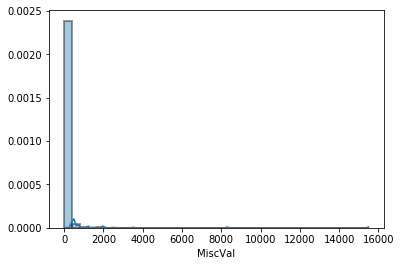

In [23]:
sns.distplot(df_train['MiscVal'],hist_kws=dict(edgecolor='k',linewidth=2))

In [24]:
for df in [df_train, df_test]:
    df['GrLivArea_Log'] = np.log(df['GrLivArea'])
    df.drop('GrLivArea', inplace= True, axis = 1)
    df['LotArea_Log'] = np.log(df['LotArea'])
    df.drop('LotArea', inplace= True, axis = 1)
    
    
    
numerical_features = df_train.dtypes[df_train.dtypes != "object"].index

Skewness: -0.006995
Kurtosis: 0.282603


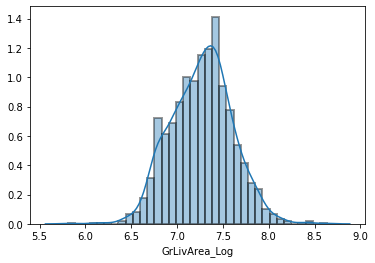

In [25]:
sns.distplot(df_train['GrLivArea_Log'],hist_kws=dict(edgecolor ='k',linewidth=2));
print("Skewness: %f" % df_train['GrLivArea_Log'].skew())
print("Kurtosis: %f" % df_train['GrLivArea_Log'].kurt())


Skewness: -0.137994
Kurtosis: 4.713358


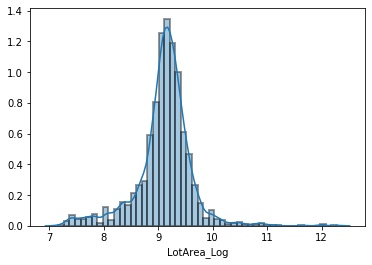

In [26]:
sns.distplot(df_train['LotArea_Log'],hist_kws=dict(edgecolor ='k',linewidth=2));
print("Skewness: %f" % df_train['LotArea_Log'].skew())
print("Kurtosis: %f" % df_train['LotArea_Log'].kurt())

In [27]:
target = 'SalePrice_log'

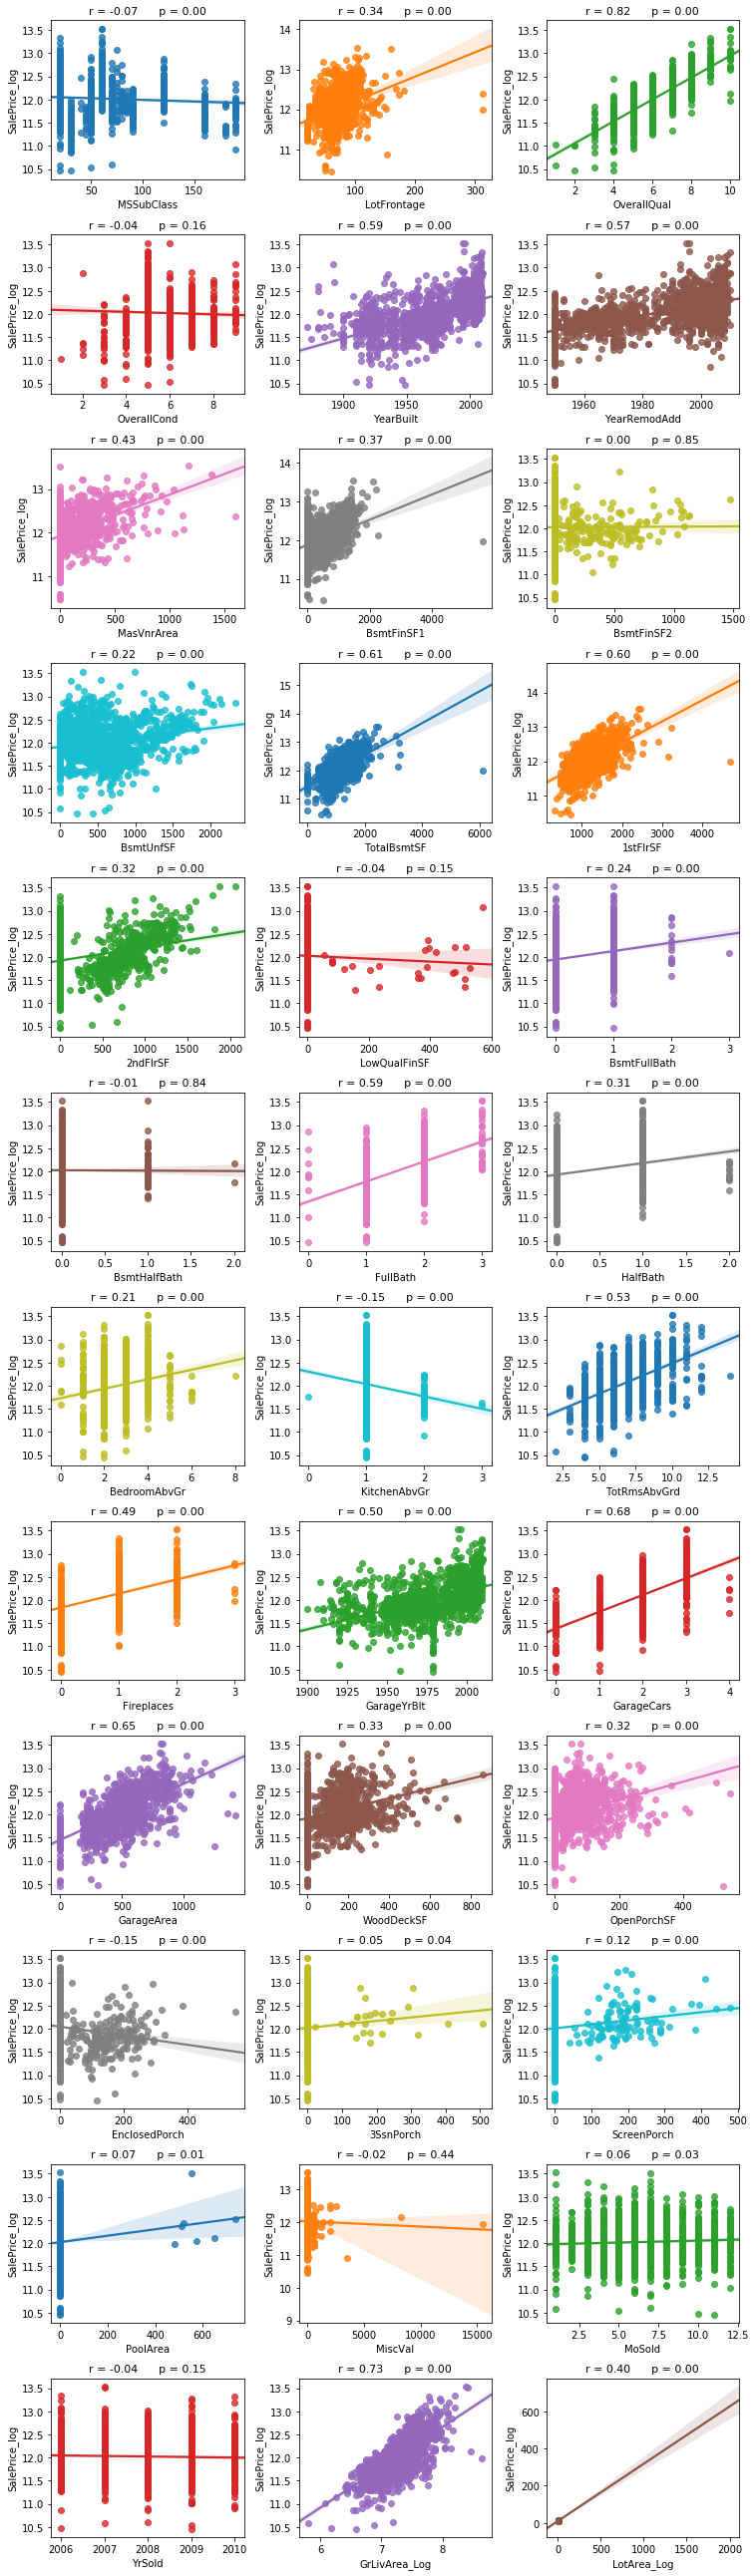

In [28]:
nr_rows = 12
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

li_num_feats = list(numerical_features)
li_not_plot = ['Id', 'SalePrice', 'SalePrice_log']
li_plot_num_feats = [c for c in list(numerical_features) if c not in li_not_plot]


for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_plot_num_feats):
            sns.regplot(df_train[li_plot_num_feats[i]], df_train[target], ax = axs[r][c])
            stp = stats.pearsonr(df_train[li_plot_num_feats[i]], df_train[target])
            #axs[r][c].text(0.4,0.9,"title",fontsize=7)
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
           
            
plt.tight_layout()    
plt.show()  

In [29]:
# Find the features which are highle co-related with target variable and will select those whose  value 0.4(threshold)
cor1 = df_train.corr()
cor2 =  abs(cor1["SalePrice_log"])
relevant_features = list(cor2[cor2.values>0.4].index)

print("List of all features with r above min_val_corr :")
print(relevant_features)
print("*"*50)



List of all features with r above min_val_corr :
['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice', 'SalePrice_log', 'GrLivArea_Log']
**************************************************


In [30]:
cor_1 = df_train.corr()
cor_abs = cor_1.abs()
nr_numer_cols = len(numerical_features)
cor = cor_abs.nlargest(nr_numer_cols,target)[target]
#nlargest function no.of values to be shown , with particular column and [target] means to show only values  of target column
#Otherwise it shows all other columns 
cor



SalePrice_log    1.000000
SalePrice        0.948374
OverallQual      0.817184
GrLivArea_Log    0.730255
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
TotRmsAbvGrd     0.534422
GarageYrBlt      0.500449
Fireplaces       0.489449
MasVnrArea       0.429531
LotArea_Log      0.399918
BsmtFinSF1       0.372023
LotFrontage      0.336156
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209044
EnclosedPorch    0.149050
KitchenAbvGr     0.147548
ScreenPorch      0.121208
MSSubClass       0.073959
PoolArea         0.069798
MoSold           0.057329
3SsnPorch        0.054900
LowQualFinSF     0.037963
YrSold           0.037263
OverallCond      0.036868
MiscVal          0.020021
Id               0.017942
BsmtHalfBath     0.005149
BsmtFinSF2  

In [31]:
corr_above_limit = list(cor[cor.values>0.4].index)
corr_below_limit = list(cor[cor.values<=0.4].index)
print("Columns_above_limit :")
print(corr_above_limit)
print("*"*100)
print("Columns_below_limit :")
print(corr_below_limit)

Columns_above_limit :
['SalePrice_log', 'SalePrice', 'OverallQual', 'GrLivArea_Log', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'TotRmsAbvGrd', 'GarageYrBlt', 'Fireplaces', 'MasVnrArea']
****************************************************************************************************
Columns_below_limit :
['LotArea_Log', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', 'OpenPorchSF', '2ndFlrSF', 'HalfBath', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'EnclosedPorch', 'KitchenAbvGr', 'ScreenPorch', 'MSSubClass', 'PoolArea', 'MoSold', '3SsnPorch', 'LowQualFinSF', 'YrSold', 'OverallCond', 'MiscVal', 'Id', 'BsmtHalfBath', 'BsmtFinSF2']


In [32]:
"""# List of Categorical features and their unique values"""

'# List of Categorical features and their unique values'

In [33]:
for cat in list(categorical_features):
    print(df_train[cat].value_counts())
    print("#"*50)

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
##################################################
Pave    1454
Grvl       6
Name: Street, dtype: int64
##################################################
None    1369
Grvl      50
Pave      41
Name: Alley, dtype: int64
##################################################
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
##################################################
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
##################################################
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
##################################################
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
##################################################
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
###########################

In [34]:
df_train[categorical_features].shape

(1460, 43)

In [35]:
""" Relation of Categorical features with Target variable"""


' Relation of Categorical features with Target variable'

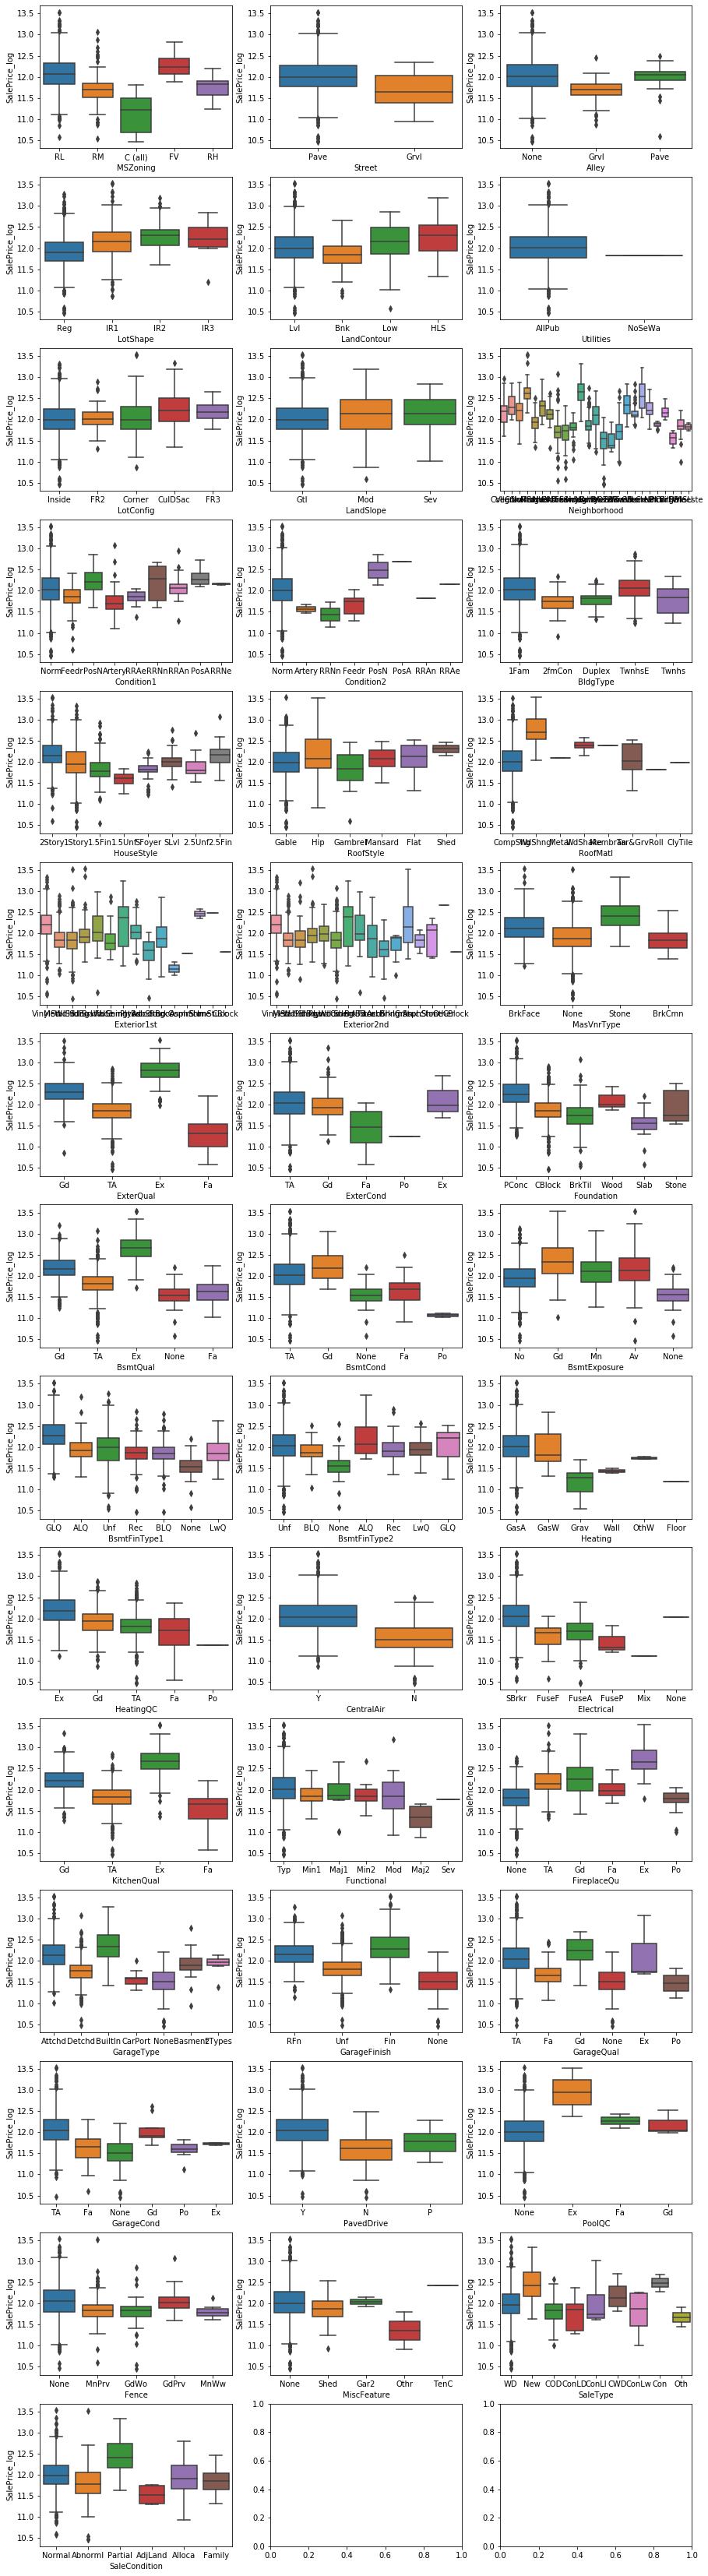

In [36]:
list_cat_feat = list(categorical_features)
nr_rows = 15
nr_cols = 3
fig, axs = plt.subplots(nr_rows,nr_cols, figsize=(nr_cols*5,nr_rows*4))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):
        i =  r*nr_cols + c
        if i <len(list_cat_feat):
            sns.boxplot(x=list_cat_feat[i],y=target,data = df_train, ax=axs[r][c])

plt.tight_layout
plt.show()            

In [37]:
df_train['SalePrice_log'].mean()

12.024050901109373

In [38]:
catg_strong_corr = [ 'MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual', 
                     'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType']

catg_weak_corr = ['Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
                  'LandSlope', 'Condition1',  'BldgType', 'HouseStyle', 'RoofStyle', 
                  'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterCond', 'Foundation', 
                  'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 
                  'HeatingQC', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 
                  'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 
                  'SaleCondition' ]

In [39]:
""" Plot of all numerical_features above the threshold value with respect to target variable"""

' Plot of all numerical_features above the threshold value with respect to target variable'

In [40]:
df_train[corr_above_limit].head()

,SalePrice_log,SalePrice,OverallQual,GrLivArea_Log,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,YearBuilt,YearRemodAdd,TotRmsAbvGrd,GarageYrBlt,Fireplaces,MasVnrArea
0,12.247694,208500,7,7.444249,2,548,856,856,2,2003,2003,8,2003.0,0,196.0
1,12.109011,181500,6,7.140453,2,460,1262,1262,2,1976,1976,6,1976.0,1,0.0
2,12.317167,223500,7,7.487734,2,608,920,920,2,2001,2002,6,2001.0,1,162.0
3,11.849398,140000,7,7.448334,3,642,756,961,1,1915,1970,7,1998.0,1,0.0
4,12.429216,250000,8,7.695303,3,836,1145,1145,2,2000,2000,9,2000.0,1,350.0


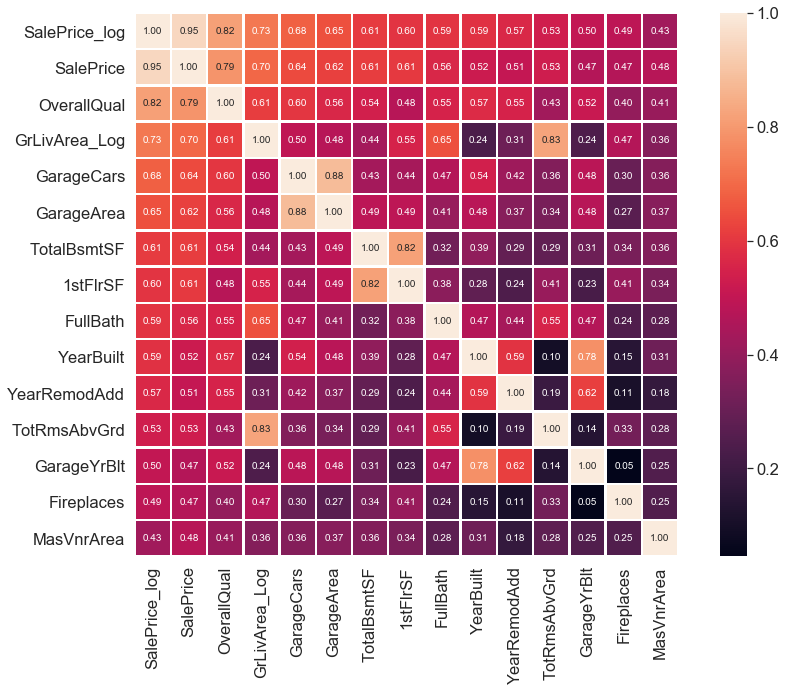

In [41]:
cor_nr_feats11 = df_train[corr_above_limit].corr()
plt.figure(figsize = (15,10))
sns.set(font_scale = 1.50)
sns.heatmap(cor_nr_feats11,yticklabels=df_train[corr_above_limit].columns, xticklabels=df_train[corr_above_limit].columns,
            annot =True , linewidths = 1.5,square=True, fmt = '.2f',annot_kws={'size' : 10})

In [42]:
""" There are some allow are correlated to each other " "
 TotRmsAbvgrd - GrlivArea_Log
GarageArea -GarageCars
1stFlrSF - TotalBsmtSF 
YearBuilt and GarageYrBlt
        
So we will drop one of  those columns  further """


' There are some allow are correlated to each other " "\n TotRmsAbvgrd - GrlivArea_Log\nGarageArea -GarageCars\n1stFlrSF - TotalBsmtSF \nYearBuilt and GarageYrBlt\n        \nSo we will drop one of  those columns  further '

In [43]:
"""#First Drop all columns Who have weak Correlations to SalePrice OR Target"""
id_test = df_test['Id']
Num_drop = corr_below_limit
Cat_drop = catg_weak_corr
Drop_cols = ['Id'] + Num_drop + Cat_drop

for columns in [df_train, df_test]:
    columns.drop(Drop_cols, inplace =True,axis = 1)



In [44]:
df_train.head()

,MSZoning,Neighborhood,Condition2,OverallQual,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,ExterQual,BsmtQual,...,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,SaleType,SalePrice,SalePrice_log,GrLivArea_Log
0,RL,CollgCr,Norm,7,2003,2003,BrkFace,196.0,Gd,Gd,...,Gd,8,0,2003.0,2,548,WD,208500,12.247694,7.444249
1,RL,Veenker,Norm,6,1976,1976,None,0.0,TA,Gd,...,TA,6,1,1976.0,2,460,WD,181500,12.109011,7.140453
2,RL,CollgCr,Norm,7,2001,2002,BrkFace,162.0,Gd,Gd,...,Gd,6,1,2001.0,2,608,WD,223500,12.317167,7.487734
3,RL,Crawfor,Norm,7,1915,1970,None,0.0,TA,TA,...,Gd,7,1,1998.0,3,642,WD,140000,11.849398,7.448334
4,RL,NoRidge,Norm,8,2000,2000,BrkFace,350.0,Gd,Gd,...,Gd,9,1,2000.0,3,836,WD,250000,12.429216,7.695303


In [45]:
catg_list = catg_strong_corr.copy()
for cat in  catg_list :
    m = df_train.groupby(cat)[target].mean()
    print(m)

MSZoning
C (all)    11.118259
FV         12.246616
RH         11.749840
RL         12.085885
RM         11.692893
Name: SalePrice_log, dtype: float64
Neighborhood
Blmngtn    12.169416
Blueste    11.826536
BrDale     11.547864
BrkSide    11.679727
ClearCr    12.239900
CollgCr    12.163641
Crawfor    12.206659
Edwards    11.712312
Gilbert    12.155803
IDOTRR     11.446889
MeadowV    11.474522
Mitchel    11.933948
NAmes      11.868045
NPkVill    11.866477
NWAmes     12.130609
NoRidge    12.676000
NridgHt    12.619411
OldTown    11.703865
SWISU      11.838435
Sawyer     11.811468
SawyerW    12.090689
Somerst    12.296495
StoneBr    12.585486
Timber     12.363455
Veenker    12.344176
Name: SalePrice_log, dtype: float64
Condition2
Artery    11.570036
Feedr     11.670631
Norm      12.025895
PosA      12.691580
PosN      12.493879
RRAe      12.154779
RRAn      11.827043
RRNn      11.435329
Name: SalePrice_log, dtype: float64
MasVnrType
BrkCmn     11.853239
BrkFace    12.163630
None       11.89

In [46]:
#Now we will assign the rank to  values of categorical columns
#Higher mean value will give high rank and low mean to lowest rank
# For example all categories like FuseA, FuseF,FuseP, Mix will be given rank 1 as they have almost same mean value
#But in SBkr = 12  so  rank is 2
#in this case it is easy for model to predict results and avoid ooverfitting


In [47]:
msz_cat2 =['RM' , 'RH']
msz_cat3 = ['RL','FV']


neighbor_cat1 = ['Blmngtn', 'ClearCr', 'CollgCr', 'Crawfor', 'Gilbert', 'NWAmes', 'Somerst', 'Timber', 'Veenker'] # Value taken from 12-12.5 range
neighbor_cat2 = ['NoRidge', 'NridgHt', 'StoneBr'] # values above 12.5

condition_cat1 = ['Norm' , 'RRAe']
condition_cat2 = ['PosA','PosN']

MasVnr_cat1 = ['Stone','BrkFace']

SlTy_catg1 = ['Oth']
SlTy_catg3 = ['CWD']
SlTy_catg4 = ['New', 'Con']





In [48]:
for df in [df_train,df_test]:
    
    df['MSZ_num'] = 1 #We creating column(MSZ_num) in df_train and df_test with values of 1
    df.loc[(df['MSZoning'].isin(msz_cat2 )), 'MSZ_num'] = 2
    #In above we replace msz_cat2 variable with value 2 and else replace with 1 i.e MSZ_num
    df.loc[(df['MSZoning'].isin(msz_cat3 )), 'MSZ_num'] = 3
    
    
    df['NbHd_num'] = 1
    df.loc[(df['Neighborhood'].isin(neighbor_cat1 )), 'NbHd_num'] = 2
    df.loc[(df['Neighborhood'].isin(neighbor_cat2 )),'NbHd_num' ] = 3
    
    
    df['Condtn_num'] = 1
    df.loc[(df['Condition2'].isin(condition_cat1 )), 'Condtn_num'] = 2
    df.loc[(df['Condition2'].isin(condition_cat2 )),'Condtn_num'] = 3
    
    
    df['MasVnr_num'] =1
    df.loc[(df['MasVnrType'].isin(MasVnr_cat1 )),'MasVnr_num'] = 2
    
    
    df['ExterQ_num'] = 1
    df.loc[(df['ExterQual'] == 'TA'), 'ExterQ_num'] = 4
    df.loc[(df['ExterQual'] == 'EX'), 'ExterQ_num'] = 3
    df.loc[(df['ExterQual'] == 'Gd'), 'ExterQ_num'] = 2
    
    
    
    df['BsQ_num'] = 1          
    df.loc[(df['BsmtQual'] == 'Gd' ), 'BsQ_num'] = 2     
    df.loc[(df['BsmtQual'] == 'Ex' ), 'BsQ_num'] = 3  
    
    
    
    df['Central_num'] = 0
    df.loc[(df['CentralAir'] == 'Y' ), 'Central_num'] = 1    

    df['Electrical_num'] = 1       
    df.loc[(df['Electrical'] == 'SBrkr' ), 'Electrical_num'] = 2 
    


    df['KitchenQ_num'] = 1       
    df.loc[(df['KitchenQual'] == 'TA' ), 'KitchenQ_num'] = 2     
    df.loc[(df['KitchenQual'] == 'Gd' ), 'KitchenQ_num'] = 3     
    df.loc[(df['KitchenQual'] == 'Ex' ), 'KitchenQ_num'] = 4      
    
    
    df['SaleTy_num'] = 2       
    df.loc[(df['SaleType'].isin(SlTy_catg1) ), 'SaleTy_num'] = 1  
    df.loc[(df['SaleType'].isin(SlTy_catg3) ), 'SaleTy_num'] = 3  
    df.loc[(df['SaleType'].isin(SlTy_catg4) ), 'SaleTy_num'] = 4  
    
    
    

In [49]:
#Dropping the converted Categorical columns
drop_cat_cols = ['Neighborhood' , 'Condition2', 'MasVnrType', 'ExterQual', 'BsmtQual','CentralAir', 'Electrical', 
                 'KitchenQual', 'SaleType','MSZoning']

for df in [df_train,df_test]:
    df.drop(drop_cat_cols,inplace = True, axis =1 )
    

In [50]:
df_train = df_train.drop(['SalePrice'] ,axis = 1)

In [51]:
df_train.head()

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,...,MSZ_num,NbHd_num,Condtn_num,MasVnr_num,ExterQ_num,BsQ_num,Central_num,Electrical_num,KitchenQ_num,SaleTy_num
0,7,2003,2003,196.0,856,856,2,8,0,2003.0,...,3,2,2,2,2,2,1,2,3,2
1,6,1976,1976,0.0,1262,1262,2,6,1,1976.0,...,3,2,2,1,4,2,1,2,2,2
2,7,2001,2002,162.0,920,920,2,6,1,2001.0,...,3,2,2,2,2,2,1,2,3,2
3,7,1915,1970,0.0,756,961,1,7,1,1998.0,...,3,2,2,1,4,1,1,2,3,2
4,8,2000,2000,350.0,1145,1145,2,9,1,2000.0,...,3,3,2,2,2,2,1,2,3,2


In [52]:
df_train.shape

(1460, 24)

In [53]:
corr22 = df_train.corr()
corr_abs22 = corr22.abs()
nr_all_cols = len(df_train)
corr_22 = corr_abs22.nlargest(nr_all_cols,target)[target]
print(corr_22)

SalePrice_log     1.000000
OverallQual       0.817184
GrLivArea_Log     0.730255
NbHd_num          0.696515
GarageCars        0.680625
KitchenQ_num      0.667893
BsQ_num           0.659285
GarageArea        0.650888
TotalBsmtSF       0.612134
ExterQ_num        0.598599
1stFlrSF          0.596981
FullBath          0.594771
YearBuilt         0.586570
YearRemodAdd      0.565608
TotRmsAbvGrd      0.534422
GarageYrBlt       0.500449
Fireplaces        0.489449
MasVnrArea        0.429531
MSZ_num           0.409405
MasVnr_num        0.398526
Central_num       0.351600
SaleTy_num        0.335339
Electrical_num    0.304862
Condtn_num        0.105442
Name: SalePrice_log, dtype: float64


In [54]:
# Drop columns below threshold value  and Column Sale  Price
Drop_Cols_belowlimit = ['MasVnr_num','Central_num','SaleTy_num','Electrical_num','Condtn_num']
for df in [df_train,df_test]:
    df.drop(Drop_Cols_belowlimit,inplace=True,axis=1)
    
    


In [55]:
df_train.columns

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'SalePrice_log', 'GrLivArea_Log', 'MSZ_num',
       'NbHd_num', 'ExterQ_num', 'BsQ_num', 'KitchenQ_num'],
      dtype='object')

In [56]:
# Removing Columnms for High Multicollinearity
col = ['GarageArea','1stFlrSF','TotRmsAbvGrd','GarageYrBlt'] 
for df in [df_train,df_test]:
    df.drop(col,inplace=True,axis =1 )
    

In [57]:
COL = df_train.columns
COL

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       'FullBath', 'Fireplaces', 'GarageCars', 'SalePrice_log',
       'GrLivArea_Log', 'MSZ_num', 'NbHd_num', 'ExterQ_num', 'BsQ_num',
       'KitchenQ_num'],
      dtype='object')

In [58]:
feats =COL.tolist()
feats

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'TotalBsmtSF',
 'FullBath',
 'Fireplaces',
 'GarageCars',
 'SalePrice_log',
 'GrLivArea_Log',
 'MSZ_num',
 'NbHd_num',
 'ExterQ_num',
 'BsQ_num',
 'KitchenQ_num']

In [59]:
features =feats.copy() 
features.remove('SalePrice_log')
print(features)

['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', 'FullBath', 'Fireplaces', 'GarageCars', 'GrLivArea_Log', 'MSZ_num', 'NbHd_num', 'ExterQ_num', 'BsQ_num', 'KitchenQ_num']


In [60]:
df_train_ml = df_train[features].copy()
df_test_ml = df_test[features].copy()
y = df_train[target]
 

In [61]:
df_train_ml.head()

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,FullBath,Fireplaces,GarageCars,GrLivArea_Log,MSZ_num,NbHd_num,ExterQ_num,BsQ_num,KitchenQ_num
0,7,2003,2003,196.0,856,2,0,2,7.444249,3,2,2,2,3
1,6,1976,1976,0.0,1262,2,1,2,7.140453,3,2,4,2,2
2,7,2001,2002,162.0,920,2,1,2,7.487734,3,2,2,2,3
3,7,1915,1970,0.0,756,1,1,3,7.448334,3,2,4,1,3
4,8,2000,2000,350.0,1145,2,1,3,7.695303,3,3,2,2,3


In [62]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(df_train_ml)
X_test = sc.transform(df_test_ml)

In [63]:
X_train = pd.DataFrame(X_train)
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.651479,1.050994,0.878668,0.511418,-0.459303,0.789741,-0.951226,0.311725,0.529260,0.438502,0.660250,-1.141668,0.643519,0.735994
1,-0.071836,0.156734,-0.429577,-0.574410,0.466465,0.789741,0.600495,0.311725,-0.381846,0.438502,0.660250,0.767651,0.643519,-0.771091
2,0.651479,0.984752,0.830215,0.323060,-0.313369,0.789741,0.600495,0.311725,0.659675,0.438502,0.660250,-1.141668,0.643519,0.735994
3,0.651479,-1.863632,-0.720298,-0.574410,-0.687324,-1.026041,0.600495,1.650307,0.541511,0.438502,0.660250,0.767651,-0.922377,0.735994
4,1.374795,0.951632,0.733308,1.364570,0.199680,0.789741,0.600495,1.650307,1.282191,0.438502,2.164095,-1.141668,0.643519,0.735994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.071836,0.918511,0.733308,-0.574410,-0.238122,0.789741,0.600495,0.311725,0.416680,0.438502,0.660250,0.767651,0.643519,-0.771091
1456,-0.071836,0.222975,0.151865,0.084843,1.104925,0.789741,2.152216,0.311725,1.106592,0.438502,0.660250,0.767651,0.643519,-0.771091
1457,0.651479,-1.002492,1.024029,-0.574410,0.215641,0.789741,2.152216,-1.026858,1.469942,0.438502,0.660250,-2.096328,-0.922377,0.735994
1458,-0.795151,-0.704406,0.539493,-0.574410,0.046905,-1.026041,-0.951226,-1.026858,-0.854471,0.438502,-0.843595,0.767651,-0.922377,0.735994


In [64]:
X_test = pd.DataFrame(X_test)
X_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.795151,-0.340077,-1.156380,-0.574410,-0.400017,-1.026041,-0.951226,-1.026858,-1.409067,-2.082023,-0.843595,0.767651,-0.922377,-0.771091
1,-0.071836,-0.439440,-1.301740,0.023903,0.619239,-1.026041,-0.951226,-1.026858,-0.226707,0.438502,-0.843595,0.767651,-0.922377,0.735994
2,-0.795151,0.852269,0.636400,-0.574410,-0.295127,0.789741,0.600495,0.311725,0.383723,0.438502,0.660250,0.767651,0.643519,-0.771091
3,-0.071836,0.885390,0.636400,-0.463612,-0.299687,0.789741,0.600495,0.311725,0.337340,0.438502,0.660250,0.767651,-0.922377,0.735994
4,1.374795,0.686666,0.345679,-0.574410,0.507509,0.789741,-0.951226,0.311725,-0.339372,0.438502,2.164095,-1.141668,0.643519,0.735994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-1.518467,-0.041991,-0.720298,-0.574410,-1.166169,-1.026041,-0.951226,-2.365440,-0.815773,-2.082023,-0.843595,0.767651,-0.922377,-0.771091
1455,-1.518467,-0.041991,-0.720298,-0.574410,-1.166169,-1.026041,-0.951226,-1.026858,-0.815773,-2.082023,-0.843595,0.767651,-0.922377,-0.771091
1456,-0.795151,-0.373198,0.539493,-0.574410,0.379817,-1.026041,0.600495,0.311725,-0.473539,0.438502,-0.843595,0.767651,-0.922377,-0.771091
1457,-0.795151,0.686666,0.345679,-0.574410,-0.331610,-1.026041,-0.951226,-2.365440,-1.171074,0.438502,-0.843595,0.767651,0.643519,-0.771091


In [65]:
"""#Apply Machine Learning Algorithim on DataSet"""

'#Apply Machine Learning Algorithim on DataSet'

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
Regressor = LinearRegression()
parameters =  {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid_linear = GridSearchCV(Regressor,parameters, cv=5, n_jobs=-1)
grid_linear.fit(X_train,y)
Best_accuracy = grid_linear.best_score_

In [67]:
Best_accuracy

0.8549515681766163

In [68]:
Best_parameters = grid_linear.best_params_
Best_parameters

{'copy_X': True, 'fit_intercept': True, 'normalize': True}

In [73]:
predict_linear = grid_linear.predict(X_test)
final_linear = pd.DataFrame()
final_linear['Id'] = id_test
final_linear['SalePrice'] = predict_linear
log_value = 1
if log_value == 1:
    final_linear['SalePrice'] = np.exp(final_linear['SalePrice'])


final_linear.to_csv('Linear.csv',index=False)


In [74]:
final_linear.head(10)

,Id,SalePrice
0,1461,94960.469316
1,1462,146411.073729
2,1463,177592.585457
3,1464,192352.794472
4,1465,212019.171264
5,1466,185840.472495
6,1467,167165.305010
7,1468,179940.353011
8,1469,208711.269792
9,1470,110278.938594


In [75]:

from sklearn.tree import DecisionTreeRegressor
Dec_Reg=  DecisionTreeRegressor()

param_grid = { 'max_depth' : [7,8,9,10] , 'max_features' : [11,12,13,14] ,
               'max_leaf_nodes' : [None, 12,15,18,20] ,'min_samples_split' : [20,25,30],
                'presort': [False,True] , 'random_state': [5] }
            
grid_dtree = GridSearchCV(Dec_Reg, param_grid, cv=5, refit=True, verbose=1)
grid_dtree.fit(X_train, y)

Best_accuracy_1 = grid_dtree.best_score_


Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2400 out of 2400 | elapsed:   20.3s finished


In [76]:
Best_accuracy_1


0.7837747145861256

In [77]:
Best_parameters1 = grid_dtree.best_params_
Best_parameters1

{'max_depth': 9,
 'max_features': 11,
 'max_leaf_nodes': None,
 'min_samples_split': 20,
 'presort': False,
 'random_state': 5}

In [81]:
pred_dtree = grid_dtree.predict(X_test)
final_dtree = pd.DataFrame()
final_dtree['id'] = id_test
final_dtree['SalePrice'] =  pred_dtree
if log_value == 1:
    final_dtree['SalePrice'] = np.exp(final_dtree['SalePrice'])
final_dtree.to_csv('Decision.csv',index=False)


In [82]:
final_dtree.head()



,id,SalePrice
0,1461,114638.186489
1,1462,145845.892169
2,1463,180370.129062
3,1464,189212.380807
4,1465,211352.100717
